###  Categorical Variable Analysis

Here, we will determine frequency counts and proportions for all categorical varibales and provide visualization for outputs

#### Step 1: Importing pandas library to read csv data file

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
csv_data = pd.read_csv('../Data/processed/bank.csv')

# Handle missing values by replacing 'unknown' with NaN and filling with the mode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_columns:
    csv_data[col] = csv_data[col].replace('unknown', np.nan)
    csv_data[col] = csv_data[col].fillna(csv_data[col].mode()[0])

In [39]:
# One-hot encode categorical variables
csv_data_encoded = pd.get_dummies(csv_data, columns=categorical_columns, drop_first=True)

#### Step 2: Data Inspection and Preprocessing

In [40]:
# Check the frequency counts for the 'outcome' column
print("Outcome variable counts:")
print(csv_data['outcome'].value_counts())

# Create target variable y from the 'outcome' column (binary classification)
y = (csv_data['outcome'] == 'yes').astype(int)

# Drop the 'outcome' column from X (features)
X = csv_data.drop(columns=['outcome'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Outcome variable counts:
outcome
no     4000
yes     521
Name: count, dtype: int64


In [41]:
# Frequency counts and proportions for categorical variables
for col in categorical_columns:
    print(f"Frequency count for {col}:")
    print(csv_data[col].value_counts())
    print(f"Proportions for {col}:")
    print(csv_data[col].value_counts(normalize=True))
    print("\n" + "-"*40)

Frequency count for job:
job
management       1007
blue-collar       946
technician        768
admin.            478
services          417
retired           230
self-employed     183
entrepreneur      168
unemployed        128
housemaid         112
student            84
Name: count, dtype: int64
Proportions for job:
job
management       0.222738
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
Name: proportion, dtype: float64

----------------------------------------
Frequency count for marital:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
Proportions for marital:
marital
married     0.618668
single      0.264543
divorced    0.116788
Name: proportion, dtype: float64

----------------------------------------
Frequency count for education:
e

#### Step 3: Visualizing Categorical Variables

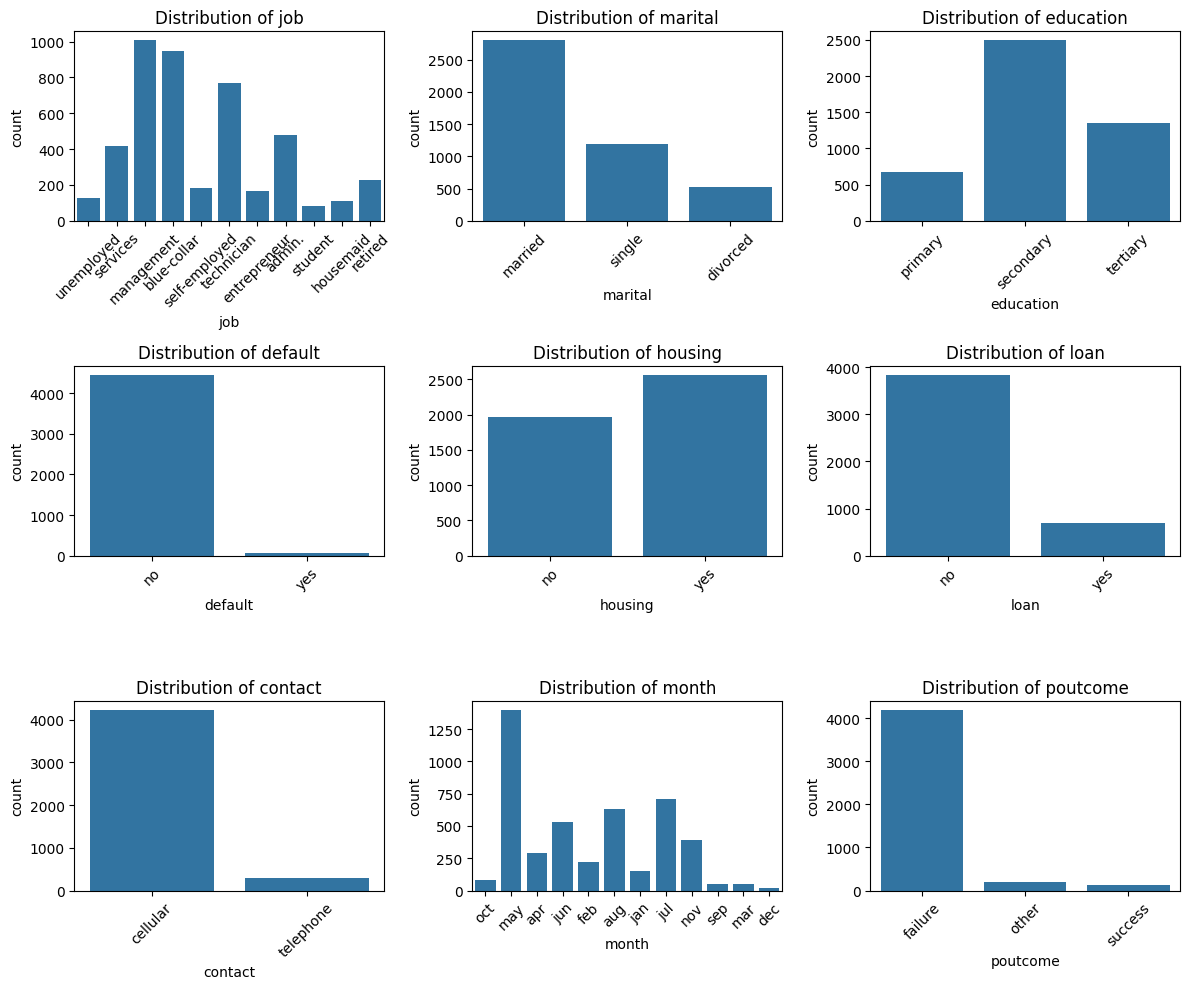

In [42]:
# Data Visualization for categorical variables (count plots)
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size as needed
    sns.countplot(x=col, data=csv_data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

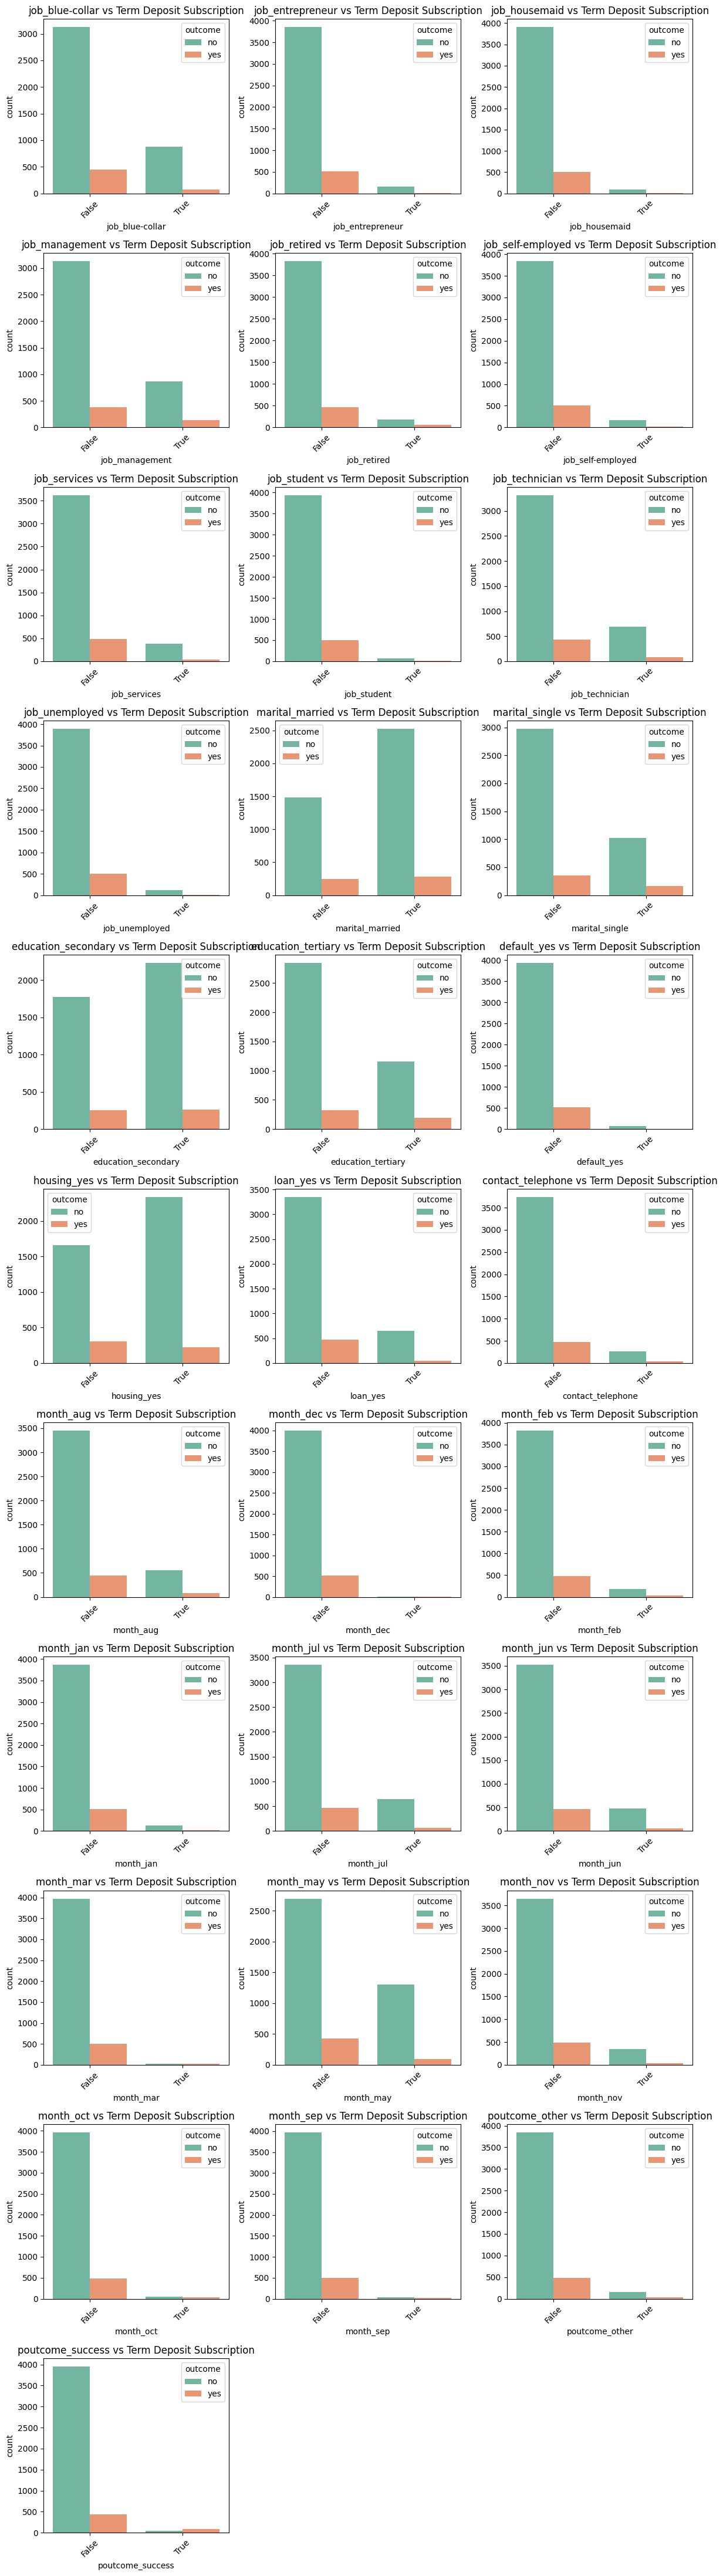

In [45]:
# Calculate the number of subplots required
num_subplots = len(one_hot_columns)

# Dynamically set the number of rows and columns based on the number of subplots
rows = (num_subplots // 3) + (1 if num_subplots % 3 != 0 else 0)  # Calculate rows based on 3 columns
cols = 3  # Fixed to 3 columns

# Create the subplots
plt.figure(figsize=(12, 4 * rows))  # Adjust the figure size to fit the number of rows

for i, col in enumerate(one_hot_columns, 1):
    plt.subplot(rows, cols, i)  # Adjust the grid size dynamically
    sns.countplot(x=col, hue='outcome', data=csv_data_encoded, palette='Set2')
    plt.title(f'{col} vs Term Deposit Subscription')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


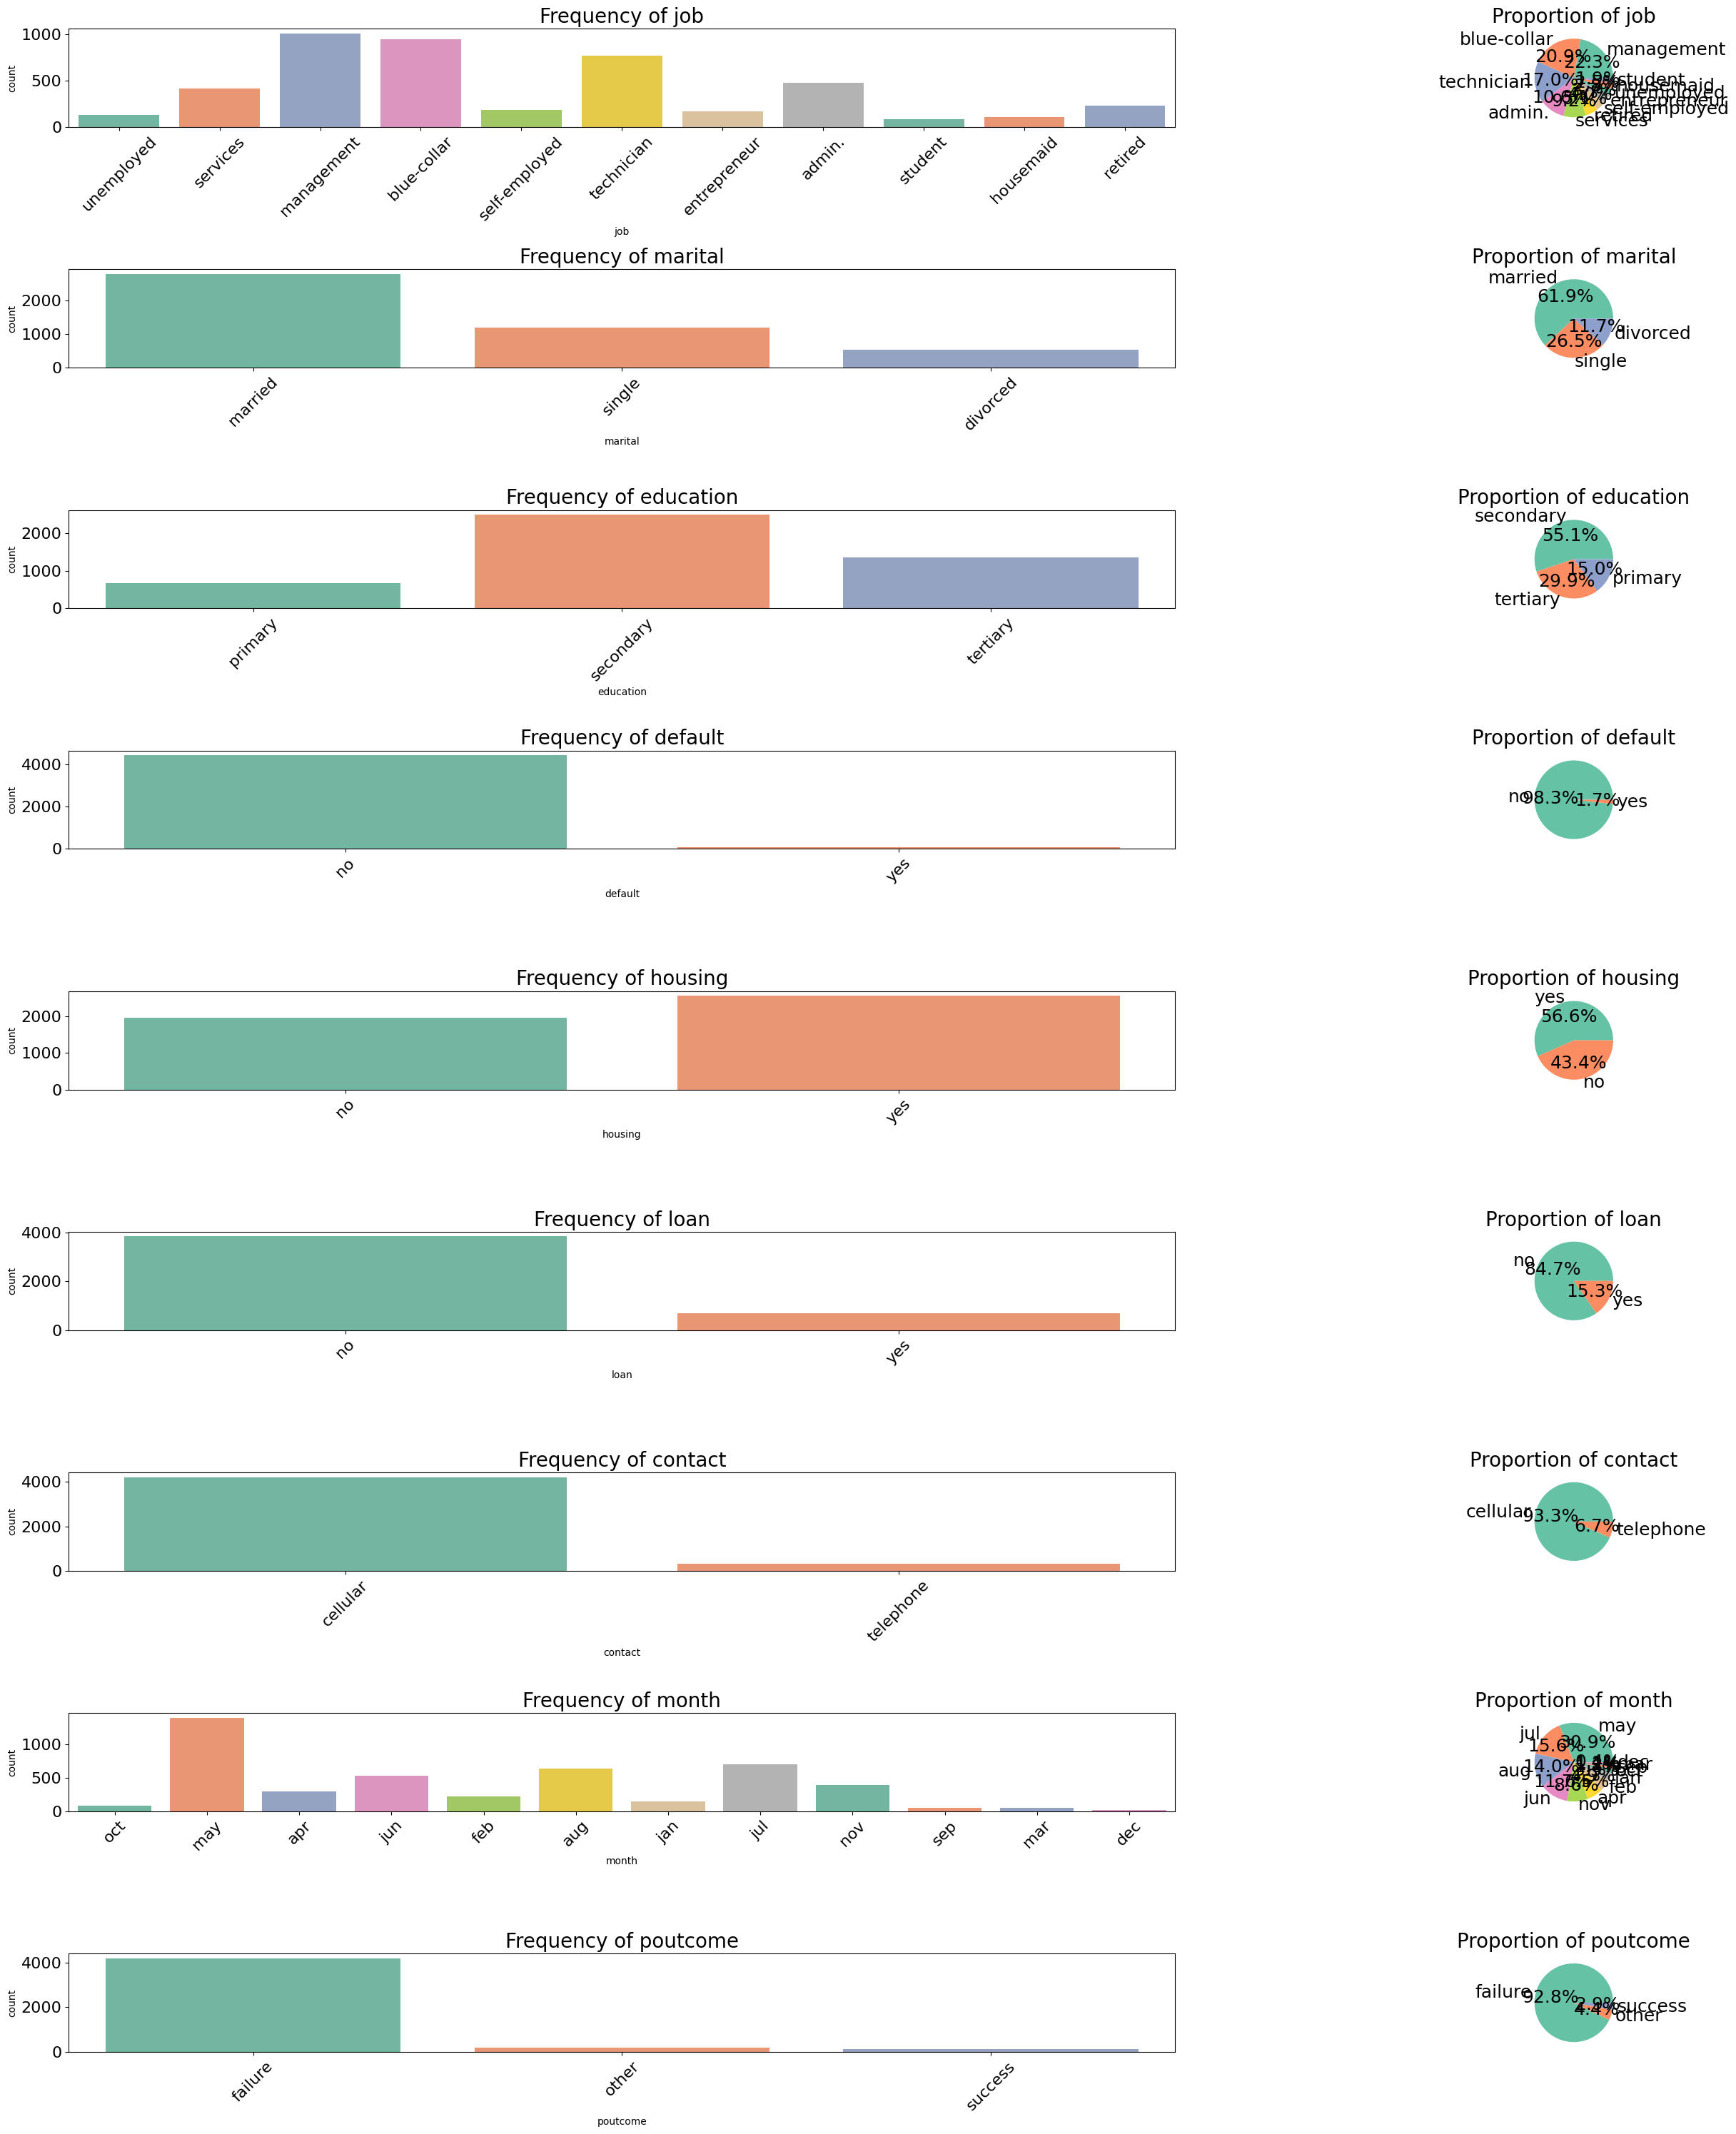

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create a larger figure to fit all the subplots
plt.figure(figsize=(30, 30))  # Significantly larger figure size

# Loop through categorical columns for both count plots and pie charts
for i, col in enumerate(categorical_cols, 1):
    # Frequency count plot (with the fix for FutureWarning)
    plt.subplot(len(categorical_cols), 2, 2 * i - 1)  # First column for count plots
    sns.countplot(x=col, data=csv_data, hue=col, palette='Set2', legend=False)
    plt.title(f'Frequency of {col}', fontsize=20)  # Increased title font size
    plt.xticks(rotation=45, fontsize=16)  # Increased x-tick font size
    plt.yticks(fontsize=16)  # Increased y-tick font size
    
    # Proportion pie chart
    plt.subplot(len(categorical_cols), 2, 2 * i)  # Second column for pie charts
    prop = csv_data[col].value_counts(normalize=True)  # Get proportions
    prop.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2', len(prop)), legend=False, fontsize=18)
    plt.title(f'Proportion of {col}', fontsize=20)  # Increased title font size
    plt.ylabel('')  # Remove the y-label for the pie chart

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.7, wspace=0.7)  # Increased spacing between plots for better readability
plt.tight_layout()
plt.show()



#### Conclusion

In conclusion, visualizing the categorical variables helps us identify how frequently each category appears within the categorical columns, helping us understand the class balance. For example, we observe that "management" and "blue-collar" workers are more prevalent with respect to term deposits when compared to other professions, or that "married" is the most common marital status.